<a href="https://colab.research.google.com/github/rohitrrk22/Deep-Learning/blob/master/Deep_Learning_NLP/Spam_Filter_For_Quora_Questions/SpamFilter_Bert_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

In [2]:
import pandas as pd
import numpy as np

In [3]:
!wget https://www.dropbox.com/sh/kpf9z73woodfssv/AAAw1_JIzpuVvwteJCma0xMla

--2020-08-30 07:54:29--  https://www.dropbox.com/sh/kpf9z73woodfssv/AAAw1_JIzpuVvwteJCma0xMla
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/kpf9z73woodfssv/AAAw1_JIzpuVvwteJCma0xMla [following]
--2020-08-30 07:54:29--  https://www.dropbox.com/sh/raw/kpf9z73woodfssv/AAAw1_JIzpuVvwteJCma0xMla
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucaa0a3c15817d2b880c7aca376f.dl.dropboxusercontent.com/zip_download_get/Ah1i0Xg4CQU6-zgL9jr4_KThk7-lt1oDtT3zWZh6J21dErIS13bGsRZwKSGbcMOnzvgyR-RX3HOJL83V982-WekXrhlg2k0LD7pgkJicjn8xeg [following]
--2020-08-30 07:54:30--  https://ucaa0a3c15817d2b880c7aca376f.dl.dropboxusercontent.com/zip_download_get/Ah1i0Xg4CQU6-zgL9jr4_KThk7-lt1oDtT3zWZh6J21dErIS13bGsRZwKSGbcMOnzvgyR-RX3HOJL83V982-We

In [4]:
train = pd.read_csv(r'/content/spam_quora_data',encoding='ISO-8859-1')

In [5]:
train.dropna(axis=0 , how='any',inplace=True)
train.rename(columns={'PK': 'qid'},inplace=True)

In [6]:
train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0.0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0.0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0.0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0.0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0.0


In [7]:
#del train["qid"]

In [8]:
from sklearn.model_selection import train_test_split

#Train & Test dataset
quora_train,quora_test=train_test_split(train,test_size=0.2,random_state=2)

del quora_train["qid"]

In [9]:
quora_train.shape

(1044897, 2)

In [10]:
quora_test.shape

(261225, 3)

In [11]:
#Train dataset split into train & validation dataset
quora_trn,quora_val=train_test_split(quora_train,test_size=0.2,random_state=2)

In [12]:
quora_trn.shape

(835917, 2)

In [13]:
quora_val.shape

(208980, 2)

In [14]:
x_train=quora_trn['question_text']
y_train=quora_trn['target']
x_test=quora_val['question_text']     
y_test=quora_val['target']

In [15]:
x_train.shape

(835917,)

In [16]:
x_test.shape

(208980,)

In [17]:
#!wget https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
!wget https://storage.googleapis.com/bert_models/2019_05_30/wwm_uncased_L-24_H-1024_A-16.zip

--2020-08-30 07:55:03--  https://storage.googleapis.com/bert_models/2019_05_30/wwm_uncased_L-24_H-1024_A-16.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1248381879 (1.2G) [application/zip]
Saving to: ‘wwm_uncased_L-24_H-1024_A-16.zip’

wwm_uncased_L-24_H- 100%[===================>]   1.16G  61.6MB/s    in 20s     

2020-08-30 07:55:24 (60.3 MB/s) - ‘wwm_uncased_L-24_H-1024_A-16.zip’ saved [1248381879/1248381879]



In [18]:
#!unzip /content/uncased_L-12_H-768_A-12.zip

!unzip /content/wwm_uncased_L-24_H-1024_A-16.zip

Archive:  /content/wwm_uncased_L-24_H-1024_A-16.zip
   creating: wwm_uncased_L-24_H-1024_A-16/
  inflating: wwm_uncased_L-24_H-1024_A-16/bert_model.ckpt.meta  
  inflating: wwm_uncased_L-24_H-1024_A-16/bert_model.ckpt.data-00000-of-00001  
  inflating: wwm_uncased_L-24_H-1024_A-16/vocab.txt  
  inflating: wwm_uncased_L-24_H-1024_A-16/bert_model.ckpt.index  
  inflating: wwm_uncased_L-24_H-1024_A-16/bert_config.json  


In [19]:
#!rm /content/wwm_uncased_L-24_H-1024_A-16.zip
! rm /content/wwm_uncased_L-24_H-1024_A-16.zip

In [20]:
embeding_index={}

f=open('/content/wwm_uncased_L-24_H-1024_A-16/vocab.txt',encoding='utf-8')

for line in f:
    values=line.split()
    word=values[0]
    coefs=np.asarray(values[1:],dtype='float32')
    embeding_index[word]=coefs
f.close()
# this again will take good amount of time

In [21]:
len(embeding_index)

30522

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import LSTM,Activation,Dense,Input,Embedding,Dropout
from tensorflow.keras.models import Model
from nltk import word_tokenize

In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
#Merging train and validation data set
X_train=pd.concat([x_train,x_test],axis=0)
Y_train=pd.concat([y_train,y_test],axis=0)
quora_test.reset_index(drop=True,inplace=True)
X_test=quora_test['question_text']     
Y_test=quora_test['target']

In [25]:
sent_lens=[len(word_tokenize(x)) for x in X_train]

In [26]:
sent_lens

[6,
 7,
 15,
 23,
 19,
 23,
 9,
 7,
 9,
 26,
 13,
 13,
 13,
 11,
 10,
 24,
 10,
 23,
 11,
 31,
 5,
 10,
 13,
 32,
 20,
 10,
 11,
 14,
 12,
 7,
 11,
 12,
 17,
 28,
 14,
 11,
 9,
 19,
 14,
 29,
 10,
 14,
 11,
 20,
 18,
 11,
 10,
 10,
 23,
 31,
 12,
 12,
 29,
 23,
 18,
 9,
 12,
 16,
 7,
 11,
 13,
 17,
 23,
 13,
 24,
 13,
 22,
 12,
 11,
 18,
 23,
 14,
 12,
 15,
 10,
 25,
 11,
 11,
 10,
 10,
 12,
 11,
 25,
 10,
 8,
 6,
 22,
 6,
 14,
 13,
 12,
 9,
 13,
 34,
 15,
 11,
 19,
 23,
 8,
 17,
 25,
 13,
 14,
 8,
 12,
 11,
 33,
 11,
 18,
 18,
 9,
 11,
 14,
 36,
 10,
 10,
 18,
 14,
 17,
 16,
 13,
 9,
 45,
 33,
 13,
 10,
 35,
 5,
 19,
 8,
 26,
 27,
 13,
 7,
 13,
 14,
 6,
 11,
 8,
 15,
 16,
 10,
 10,
 14,
 13,
 17,
 13,
 11,
 19,
 40,
 7,
 17,
 13,
 14,
 9,
 14,
 5,
 5,
 9,
 7,
 17,
 12,
 25,
 13,
 7,
 7,
 7,
 11,
 17,
 6,
 19,
 27,
 18,
 12,
 22,
 20,
 8,
 11,
 14,
 9,
 28,
 24,
 10,
 10,
 20,
 9,
 12,
 8,
 16,
 12,
 13,
 12,
 12,
 32,
 8,
 9,
 15,
 14,
 9,
 8,
 10,
 12,
 13,
 14,
 11,
 8,
 17,
 15,
 1

In [27]:
max(sent_lens)

412

In [28]:
np.percentile(sent_lens,95)

30.0

In [29]:
max_len=30

tk=Tokenizer(char_level=False,split=' ')

tk.fit_on_texts(X_train)

seq_train=tk.texts_to_sequences(X_train)
seq_test=tk.texts_to_sequences(X_test)

vocab_size=len(tk.word_index)

seq_train_matrix=sequence.pad_sequences(seq_train,maxlen=max_len)
seq_test_matrix=sequence.pad_sequences(seq_test,maxlen=max_len)

In [30]:
vocab_size

196220

In [31]:
embedding_matrix=np.zeros((vocab_size+1,300))
words_not_available=0
for word,i in tk.word_index.items():
    try:
      embed_vector=ft_model[word]
      embedding_matrix[i]=embed_vector
    except:
      words_not_available+=1

In [32]:
print(words_not_available)

196220


In [33]:
# LSTM Model with Glove Embedding Layer

inputs=Input(name='text_input',shape=[max_len])
embed=Embedding(vocab_size+1,300,input_length=max_len,mask_zero=True,
                weights=[embedding_matrix],trainable=False)(inputs)
lstm_layer=LSTM(150)(embed)
dense1=Dense(75,activation='relu')(lstm_layer)
drop1=Dropout(0.2)(dense1)
dense2=Dense(35,activation='relu')(drop1)
drop2=Dropout(0.2)(dense2)
dense3=Dense(15,activation='relu')(drop2)
drop3=Dropout(0.2)(dense3)
final_layer=Dense(1,activation='sigmoid')(drop3)

model=Model(inputs=inputs,outputs=final_layer)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_input (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 30, 300)           58866300  
_________________________________________________________________
lstm (LSTM)                  (None, 150)               270600    
_________________________________________________________________
dense (Dense)                (None, 75)                11325     
_________________________________________________________________
dropout (Dropout)            (None, 75)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 35)                2660      
_________________________________________________________________
dropout_1 (Dropout)          (None, 35)               

In [34]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history=model.fit(seq_train_matrix,Y_train,validation_data=(seq_test_matrix,Y_test),epochs=2,batch_size=150)

Epoch 1/2
6966/6966 [==============================] - 827s 119ms/step - loss: 0.2972 - accuracy: 0.9380 - val_loss: 0.2303 - val_accuracy: 0.9388
Epoch 2/2
6966/6966 [==============================] - 832s 119ms/step - loss: 0.2325 - accuracy: 0.9380 - val_loss: 0.2303 - val_accuracy: 0.9388


In [ ]:
# # save model structure to JSON (no weights)
# model_json = model.to_json()
# with open("model_to_json.json", "w") as json_file:
#     json_file.write(model_json)
# # saving the model weight separately
# model.save_weights("j_model.h5")

In [37]:
#Prediction on Test Data Set
predict=model.predict(seq_test_matrix)

In [38]:
from sklearn.metrics import roc_auc_score,confusion_matrix
roc_auc_score(Y_test,predict)

0.5

In [39]:
Y_Predicted = pd.DataFrame(predict, index=range(predict.shape[0]),
                     columns=range(predict.shape[1]))
Y_Predicted = np.where(Y_Predicted > 0.5, 1, 0)
Y_test=Y_test.astype(int)
Y_Predicted = pd.DataFrame(list(Y_Predicted),columns=['Predicted Target'])
Y_Actual = pd.DataFrame(Y_test.values,columns=["Actual Target"])
Final_Comparison=pd.concat([quora_test['qid'],quora_test['question_text'],Y_Actual,Y_Predicted],axis=1)

In [40]:
Final_Comparison.head(10)

,qid,question_text,Actual Target,Predicted Target
0,8747d2afef04f494fd71,"How does stopping refugee families, women and ...",1,0
1,5ad7be48609f9b63a5b0,What makes you start your business?,0,0
2,be9e2e86a915f88212f9,"Someone said they wouldn't give me something ""...",0,0
3,bc721413105adba6d757,What is best option for a disqualified medical...,0,0
4,79a5f298b4b5dbac4dd7,What are the best sites to create apps on Andr...,0,0
5,ff1fd33a96c6c72b61b6,Which is the best homeopathic face wash for wo...,0,0
6,251b29aa445efc14aa04,Is it possible that the laws of physics may ha...,0,0
7,412350e4aaa272a16f81,What's your take on the dispute between core d...,0,0
8,bfd87b2feffdeee55656,What is the basic difference between Automatic...,0,0
9,99a93d95d6d030de6205,How is the taste of SirkkaleipÃ¤?,0,0


In [41]:
confusion_matrix(Y_Actual,Y_Predicted)

array([[245234,      0],
       [ 15991,      0]])

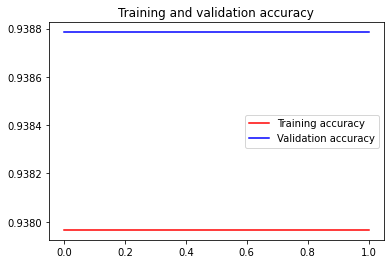

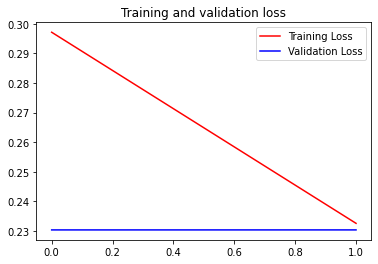

In [42]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()